In [41]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import numpy as np
os.chdir("/home/jok120/sml/proj/attention-is-all-you-need-pytorch/")

# Analysis

In [42]:
from glob import glob
import seaborn as sns
sns.set(style="darkgrid")

In [54]:
result_files = sorted(glob("logs/0602/0602-q1_adam*.train"))
result_files = sorted(glob("/home/jok120/Desktop/safekeeping/0602-q3_adam-0457c.train"))
result_files[0]

'/home/jok120/Desktop/safekeeping/0602-q3_adam-0457c.train'

In [55]:
dfs = [pd.read_csv(f) for f in result_files]
titles = [f[10:-6] for f in result_files]
dfes = []
for df in dfs:
    dfes.append(df[df["is_end_of_epoch"]].reset_index())

In [65]:
!pwd

/home/jok120/sml/proj/attention-is-all-you-need-pytorch


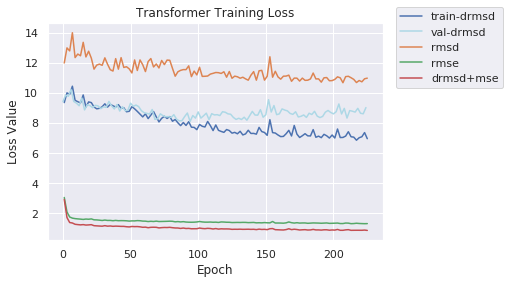

In [67]:
def do_plot(df, title):
    dfval = df[df["is_val"]]
    dftrain = df[df["is_val"] != True]
    sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="train-drmsd")
    sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="val-drmsd",color="lightblue")
    sns.lineplot(x=dftrain.index, y="rmsd", data=dftrain, label="rmsd")
    sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="rmse")
    sns.lineplot(x=dftrain.index, y="combined", data=dftrain, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("Transformer Training Loss".format(title))
    plt.savefig("figs/transtrain.pdf", pad_inches=1, bbox_inches="tight")
do_plot(dfes[0], titles[0])

In [53]:
dfes[0][dfes[0]["is_val"]]

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time


In [47]:
mins = []
for df, title in zip(dfes, titles):
    try:
        row = df[df["combined"] == df["combined"].min()]
    except KeyError:
        print(title)
        continue
    row["title"] = title[:]
    mins.append(row)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0602-q1_adam-0536
0602-q1_adam-0537
0602-q1_adam-0539
0602-q1_adam-0541
0602-q1_adam-0542
0602-q1_adam-0544
0602-q1_adam-0545
0602-q1_adam-0546
0602-q1_adam-0548
0602-q1_adam-0549
0602-q1_adam-0551
0602-q1_adam-0552
0602-q1_adam-0553
0602-q1_adam-0554
0602-q1_adam-0556
0602-q1_adam-0558
0602-q1_adam-0559
0602-q1_adam-0561
0602-q1_adam-0562
0602-q1_adam-0563
0602-q1_adam-0564
0602-q1_adam-0565
0602-q1_adam-0566
0602-q1_adam-0567
0602-q1_adam-0568
0602-q1_adam-0569
0602-q1_adam-0570
0602-q1_adam-0571
0602-q1_adam-0572
0602-q1_adam-0573
0602-q1_adam-0574
0602-q1_adam-0575
0602-q1_adam-0577
0602-q1_adam-0579
0602-q1_adam-0580
0602-q1_adam-0581
0602-q1_adam-0582
0602-q1_adam-0583
0602-q1_adam-0584
0602-q1_adam-0587
0602-q1_adam-0589
0602-q1_adam-0590
0602-q1_adam-0592
0602-q1_adam-0593
0602-q1_adam-0594
0602-q1_adam-0595
0602-q1_adam-0596
0602-q1_adam-0597
0602-q1_adam-0598
0602-q1_adam-0599
0602-q1_adam-0601
0602-q1_adam-0602
0602-q1_adam-0603
0602-q1_adam-0604
0602-q1_adam-0606
0602-q1_ad

0602-q1_adam-1173
0602-q1_adam-1175
0602-q1_adam-1176
0602-q1_adam-1177
0602-q1_adam-1180
0602-q1_adam-1182
0602-q1_adam-1184
0602-q1_adam-1185
0602-q1_adam-1186
0602-q1_adam-1188
0602-q1_adam-1189
0602-q1_adam-1190
0602-q1_adam-1191
0602-q1_adam-1193
0602-q1_adam-1195
0602-q1_adam-1196
0602-q1_adam-1197
0602-q1_adam-1198
0602-q1_adam-1199
0602-q1_adam-1200
0602-q1_adam-1201
0602-q1_adam-1202
0602-q1_adam-1203
0602-q1_adam-1205
0602-q1_adam-1206
0602-q1_adam-1207
0602-q1_adam-1208
0602-q1_adam-1209
0602-q1_adam-1210
0602-q1_adam-1212
0602-q1_adam-1214
0602-q1_adam-1215
0602-q1_adam-1216
0602-q1_adam-1218
0602-q1_adam-1219
0602-q1_adam-1220
0602-q1_adam-1221
0602-q1_adam-1222
0602-q1_adam-1224
0602-q1_adam-1225
0602-q1_adam-1226
0602-q1_adam-1227
0602-q1_adam-1228
0602-q1_adam-1231
0602-q1_adam-1232
0602-q1_adam-1234
0602-q1_adam-1235
0602-q1_adam-1236
0602-q1_adam-1237
0602-q1_adam-1238
0602-q1_adam-1239
0602-q1_adam-1242
0602-q1_adam-1244
0602-q1_adam-1245
0602-q1_adam-1247
0602-q1_ad

0602-q1_adam-1958
0602-q1_adam-1960
0602-q1_adam-1961
0602-q1_adam-1962
0602-q1_adam-1963
0602-q1_adam-1964
0602-q1_adam-1965
0602-q1_adam-1966
0602-q1_adam-1967
0602-q1_adam-1968
0602-q1_adam-1970
0602-q1_adam-1973
0602-q1_adam-1974
0602-q1_adam-1975
0602-q1_adam-1976
0602-q1_adam-1977
0602-q1_adam-1978
0602-q1_adam-1979
0602-q1_adam-1982
0602-q1_adam-1984
0602-q1_adam-1986
0602-q1_adam-1987
0602-q1_adam-1988
0602-q1_adam-1989
0602-q1_adam-1990
0602-q1_adam-1991
0602-q1_adam-1992
0602-q1_adam-1994
0602-q1_adam-1996
0602-q1_adam-1997
0602-q1_adam-1998
0602-q1_adam-2000
0602-q1_adam-2001
0602-q1_adam-2002
0602-q1_adam-2003
0602-q1_adam-2005
0602-q1_adam-2008
0602-q1_adam-2009
0602-q1_adam-2011
0602-q1_adam-2012
0602-q1_adam-2013
0602-q1_adam-2014
0602-q1_adam-2015
0602-q1_adam-2016
0602-q1_adam-2018
0602-q1_adam-2019
0602-q1_adam-2020
0602-q1_adam-2021
0602-q1_adam-2023
0602-q1_adam-2024
0602-q1_adam-2025
0602-q1_adam-2026
0602-q1_adam-2027
0602-q1_adam-2028
0602-q1_adam-2029
0602-q1_ad

In [48]:
mins_df = pd.concat(mins)

In [49]:
mins_df.sort_values("combined", inplace=True)

In [50]:
mins_df

,index,drmsd,rmse,rmsd,combined,lr,is_val,is_end_of_epoch,time,title
404,3239,3.503024,1.175756,5.962054,0.564539,0,False,True,1.559469e+09,0602-q1_adam-0475
305,2447,3.384590,1.285928,5.643415,0.624940,0,False,True,1.559457e+09,0602-q1_adam-0162
317,2543,3.451980,1.287417,5.872189,0.630110,0,False,True,1.559465e+09,0602-q1_adam-0349
242,1943,3.511992,1.291819,6.210064,0.636698,0,False,True,1.559471e+09,0602-q1_adam-0547
356,2855,3.482114,1.301115,6.214204,0.640857,0,False,True,1.559453e+09,0602-q1_adam-0043
215,1727,3.369591,1.312424,5.780886,0.641214,0,False,True,1.559464e+09,0602-q1_adam-0336
590,4727,3.060524,1.345275,5.269483,0.643724,0,False,True,1.559467e+09,0602-q1_adam-0434
287,2303,3.759696,1.284954,5.900376,0.647757,0,False,True,1.559467e+09,0602-q1_adam-0433
226,1815,3.671889,1.300124,6.187389,0.652074,0,False,True,1.559470e+09,0602-q1_adam-0510
370,2967,3.606696,1.316826,6.031481,0.658926,0,False,True,1.559474e+09,0602-q1_adam-0858


In [51]:
names =  [int(t[-3:]) for t in mins_df["title"][:10]]
print(names)

[475, 162, 349, 547, 43, 336, 434, 433, 510, 858]


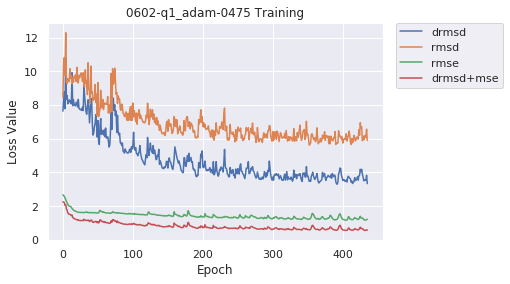

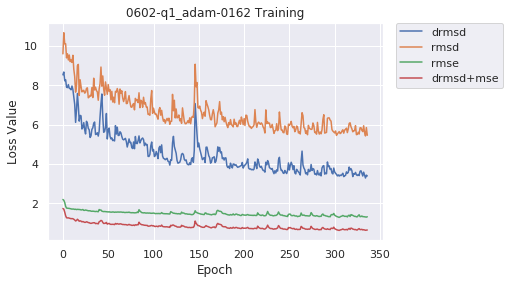

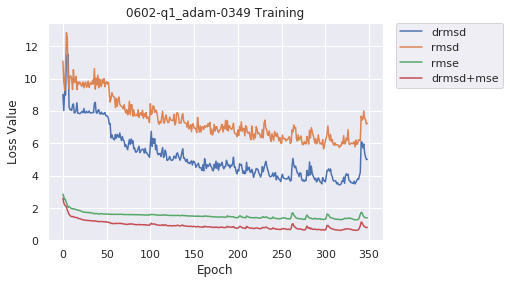

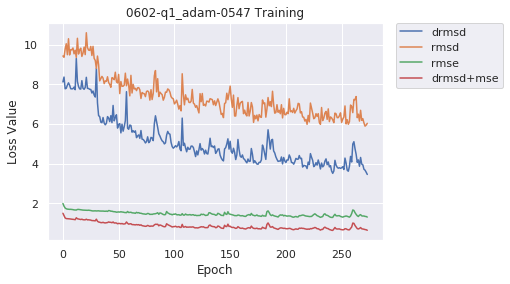

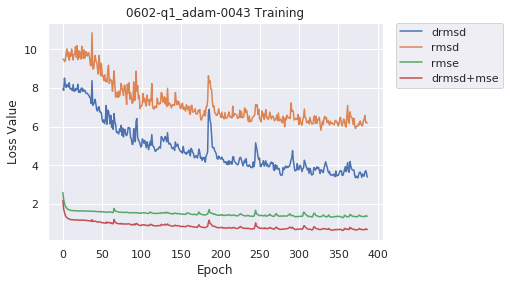

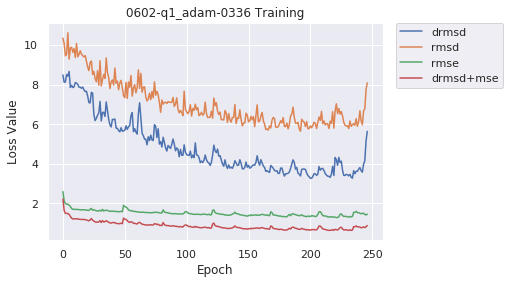

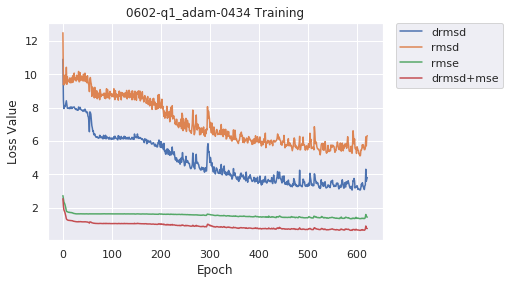

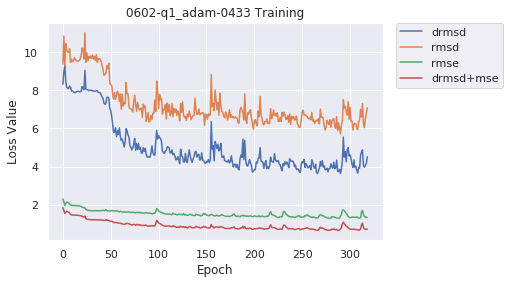

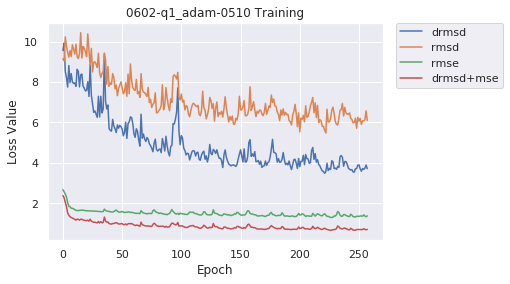

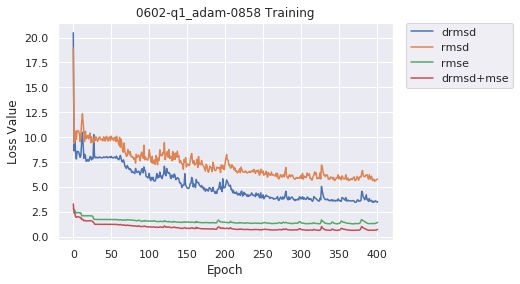

In [52]:
for n in names:
    do_plot(dfes[n], titles[n])
    plt.show()

In [14]:
import re
def get_arg(namespace, arg):
    pattern = f"{arg}=(.+?),"
    return re.search(pattern, namespace).group(1)

In [17]:
for row in mins:
    t = row["title"].item()
    with open(f"logs/0602/{t}.log", "r") as f:
        args = f.readline()
    for a in ["d_model","d_k","d_v","n_head","n_layers"]:
        row[a] = get_arg(args, a)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
mins = pd.concat(mins)
mins.sort_values("combined", inplace=True)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
mins

,combined,d_inner_hid,d_k,d_model,d_v,drmsd,index,is_end_of_epoch,is_val,lr,n_head,n_layers,n_warmup_steps,rmsd,rmse,time,title
404,0.564539,NaN,52,20,52,3.503024,3239,True,False,0,2,2,NaN,5.962054,1.175756,1.559469e+09,0602-q1_adam-0475
305,0.624940,NaN,52,12,52,3.384590,2447,True,False,0,6,1,NaN,5.643415,1.285928,1.559457e+09,0602-q1_adam-0162
317,0.630110,NaN,26,20,26,3.451980,2543,True,False,0,8,2,NaN,5.872189,1.287417,1.559465e+09,0602-q1_adam-0349
242,0.636698,NaN,128,20,26,3.511992,1943,True,False,0,2,2,NaN,6.210064,1.291819,1.559471e+09,0602-q1_adam-0547
356,0.640857,2048,26,12,52,3.482114,2855,True,False,0,2,2,1000,6.214204,1.301115,1.559453e+09,0602-q1_adam-0043
215,0.641214,NaN,26,20,26,3.369591,1727,True,False,0,4,1,NaN,5.780886,1.312424,1.559464e+09,0602-q1_adam-0336
590,0.643724,NaN,52,20,26,3.060524,4727,True,False,0,1,4,NaN,5.269483,1.345275,1.559467e+09,0602-q1_adam-0434
287,0.647757,NaN,52,20,26,3.759696,2303,True,False,0,1,2,NaN,5.900376,1.284954,1.559467e+09,0602-q1_adam-0433
226,0.652074,NaN,52,20,128,3.671889,1815,True,False,0,2,1,NaN,6.187389,1.300124,1.559470e+09,0602-q1_adam-0510
370,0.658926,NaN,52,56,128,3.606696,2967,True,False,0,12,1,NaN,6.031481,1.316826,1.559474e+09,0602-q1_adam-0858


In [20]:
sorted(list(map(int,set(mins["d_model"]))))

[12, 20, 56, 128, 512, 1024, 2048]

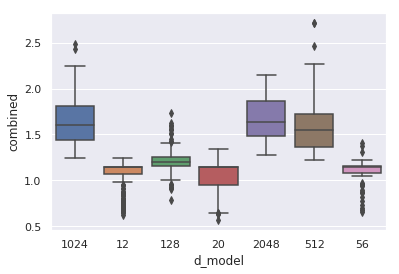

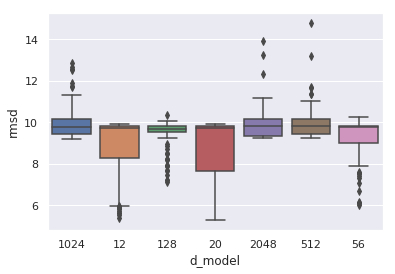

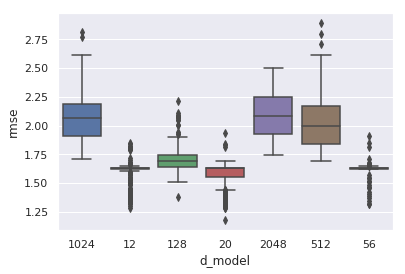

In [31]:
def do_loss_plots_on_var(d, var, swarm=True):
    sns.boxplot(x=var, y="combined", data=d)
    if swarm: sns.swarmplot(x=var, y="combined", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmsd", data=d)
    if swarm: sns.swarmplot(x=var, y="rmsd", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmse", data=d)
    if swarm: sns.swarmplot(x=var, y="rmse", data=d, color="black")

do_loss_plots_on_var(mins, "d_model", swarm=False)

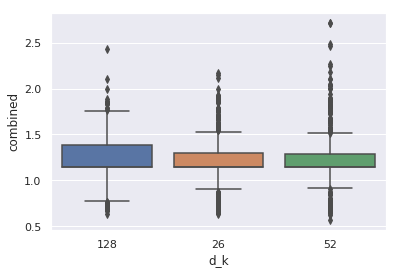

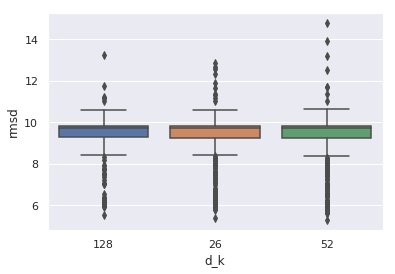

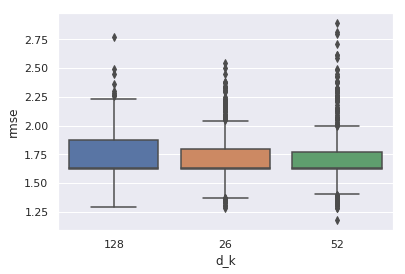

In [32]:
do_loss_plots_on_var(mins, "d_k", swarm=False)

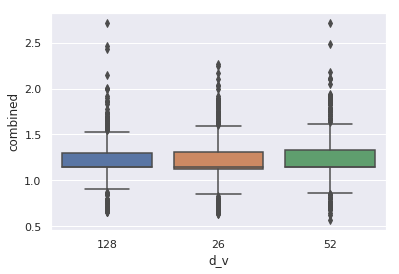

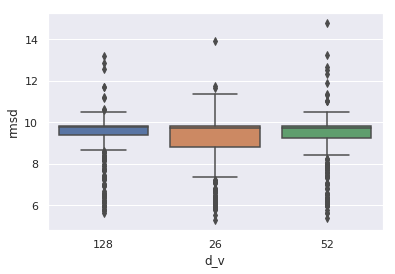

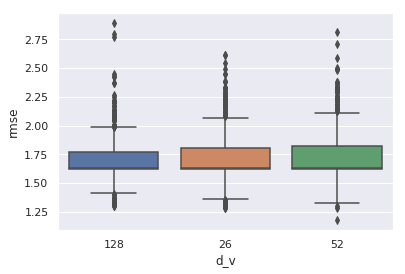

In [33]:
do_loss_plots_on_var(mins, "d_v", swarm=False)

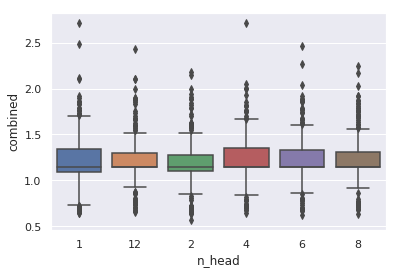

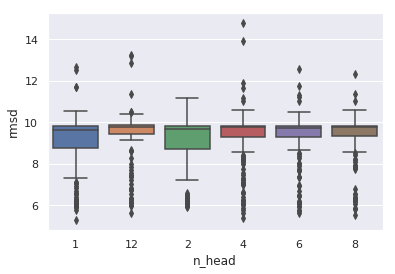

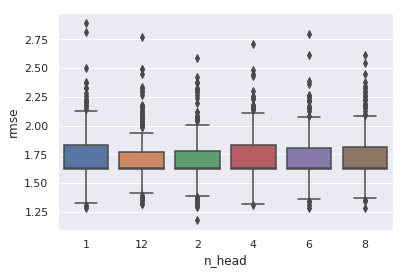

In [34]:
do_loss_plots_on_var(mins, "n_head", swarm=False)

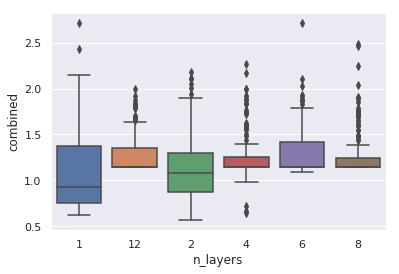

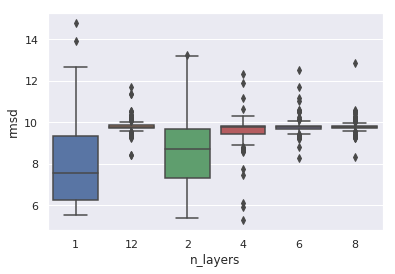

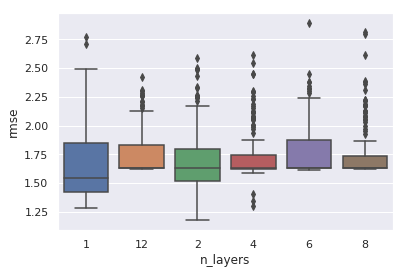

In [36]:
do_loss_plots_on_var(mins, "n_layers", swarm=False)

In [38]:
summary = mins[["title", "combined", "drmsd", "rmsd", "rmse", "d_model","d_k","d_v","n_head","n_layers"]]

In [39]:
" ".join(summary["title"][-1:].to_list())

'0602-q1_adam-1452'

In [40]:
summary

,title,combined,drmsd,rmsd,rmse,d_model,d_k,d_v,n_head,n_layers
404,0602-q1_adam-0475,0.564539,3.503024,5.962054,1.175756,20,52,52,2,2
305,0602-q1_adam-0162,0.624940,3.384590,5.643415,1.285928,12,52,52,6,1
317,0602-q1_adam-0349,0.630110,3.451980,5.872189,1.287417,20,26,26,8,2
242,0602-q1_adam-0547,0.636698,3.511992,6.210064,1.291819,20,128,26,2,2
356,0602-q1_adam-0043,0.640857,3.482114,6.214204,1.301115,12,26,52,2,2
215,0602-q1_adam-0336,0.641214,3.369591,5.780886,1.312424,20,26,26,4,1
590,0602-q1_adam-0434,0.643724,3.060524,5.269483,1.345275,20,52,26,1,4
287,0602-q1_adam-0433,0.647757,3.759696,5.900376,1.284954,20,52,26,1,2
226,0602-q1_adam-0510,0.652074,3.671889,6.187389,1.300124,20,52,128,2,1
370,0602-q1_adam-0858,0.658926,3.606696,6.031481,1.316826,56,52,128,12,1
